<a href="https://colab.research.google.com/github/Ednip7/MLWPy/blob/master/PracticeU4PDSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset("iris")
iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


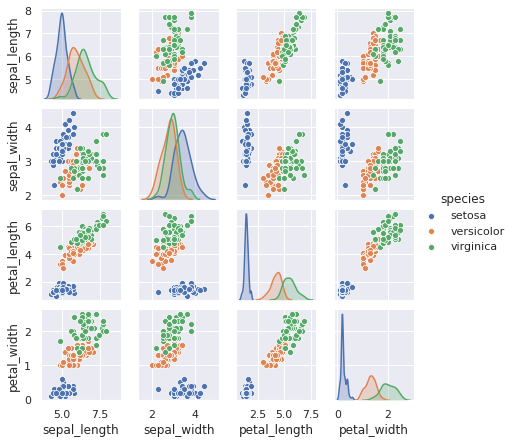

In [52]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris.loc[:, ["sepal_length",	"sepal_width", "petal_length",	"petal_width", "species"]], hue = "species", height = 1.5)
#sns.pairplot(iris, hue = "species", height = 1.5)

In [3]:
X_iris = iris.drop("species", axis = 1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

Supervised Learning example


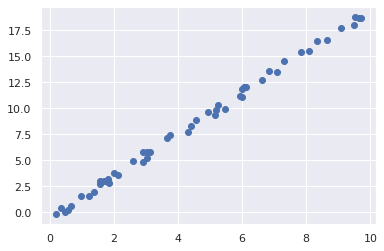

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

rng = np.random.RandomState(42)
x = 10* rng.rand(50)
y = 2 * x -1 + rng.rand(50)
plt.scatter(x,y)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([2.00660766])

In [11]:
model.intercept_

-0.5350275750800026

In [12]:
xnew = np.linspace(-1, 11)
Xnew = xnew[:,np.newaxis]
Xnew.shape

(50, 1)

In [0]:
yhat = model.predict(Xnew)

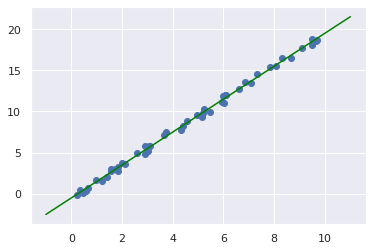

In [14]:
plt.scatter(x,y)
plt.plot(Xnew, yhat, color = "green")

Supervised learning example (Iris)

Gaussian naive Bayes

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 1)

In [0]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.9666666666666667

Unsupervised learning


Dimensionality reduction

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_2D = model.transform(X_iris)

In [25]:
X_2D.shape

(150, 2)

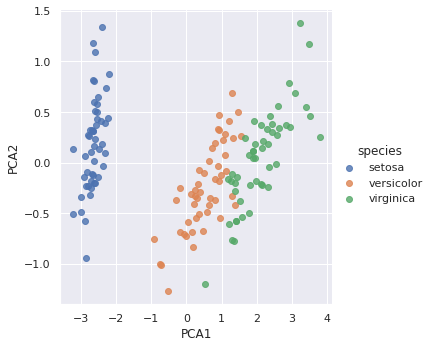

In [28]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2", hue = "species", data=iris, fit_reg = False)

UnSup Clustering

In [0]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3,
                        covariance_type = "full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)
# En este modelo no veo como en la grafica se relaciona el cluster con la etiqueta

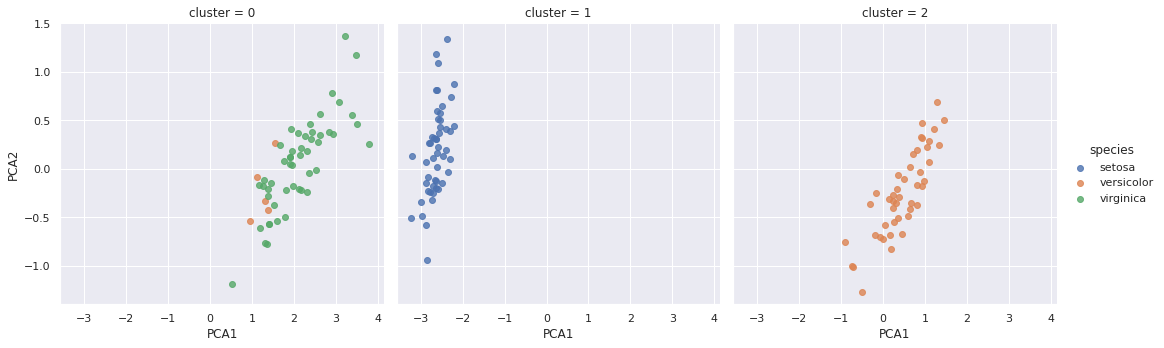

In [40]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data = iris, hue= "species",
           col = "cluster", fit_reg = False)